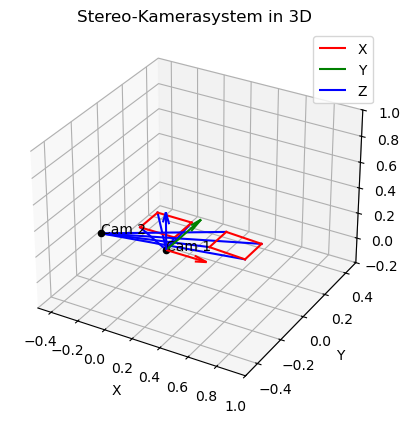

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_camera(ax, K, rvec, tvec, label='Camera', scale=0.2):
    R, _ = cv2.Rodrigues(rvec)
    t = tvec.reshape(3, 1)
    camera_center = -R.T @ t

    # Frustum: Bildgröße in Pixeln (angenommen)
    img_w, img_h = 1280, 720
    frustum_img_pts = np.array([
        [0, 0, 1],
        [img_w, 0, 1],
        [img_w, img_h, 1],
        [0, img_h, 1]
    ]).T

    K_inv = np.linalg.inv(K)
    rays = K_inv @ frustum_img_pts
    rays = rays * scale  # Sichtfeld-Tiefe skalieren
    frustum_world = (R @ rays) + t

    for i in range(4):
        x = [camera_center[0, 0], frustum_world[0, i]]
        y = [camera_center[1, 0], frustum_world[1, i]]
        z = [camera_center[2, 0], frustum_world[2, i]]
        ax.plot(x, y, z, 'b')

    for i in range(4):
        j = (i + 1) % 4
        ax.plot([frustum_world[0, i], frustum_world[0, j]],
                [frustum_world[1, i], frustum_world[1, j]],
                [frustum_world[2, i], frustum_world[2, j]], 'r')

    ax.scatter(*camera_center, c='k', marker='o')
    ax.text(*camera_center.ravel(), label, color='black')


# Kameramatrix (identisch für beide Kameras hier)
K = np.array([
    [1000, 0, 640],
    [0, 1000, 360],
    [0, 0, 1]
])

# Kamera 1 (Referenzkamera)
rvec1 = np.zeros(3)              # keine Rotation
tvec1 = np.zeros(3)             # Ursprung

# Kamera 2 (Stereo-Kamera rechts daneben, leicht gedreht)
rvec2 = np.array([0, 0.05, 0])  # kleine Y-Rotation
tvec2 = np.array([0.5, 0, 0])   # 0.5 m nach rechts

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Beide Kameras zeichnen
draw_camera(ax, K, rvec1, tvec1, label='Cam 1')
draw_camera(ax, K, rvec2, tvec2, label='Cam 2')

# Weltachsen
ax.quiver(0, 0, 0, 0.3, 0, 0, color='r', label='X')
ax.quiver(0, 0, 0, 0, 0.3, 0, color='g', label='Y')
ax.quiver(0, 0, 0, 0, 0, 0.3, color='b', label='Z')

# Achsenlimits
ax.set_xlim([-0.5, 1])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([-0.2, 1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Stereo-Kamerasystem in 3D")
ax.legend()
plt.show()
